In [ ]:
import pandas as pd
import numpy as np 
from predicting_loan_payback.scr.utils import compare_counts, compare_hists, missing_data

train_csv_path = "data/train.csv"

In [20]:
frame = pd.read_csv(train_csv_path, index_col=0)

In [21]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593994 entries, 0 to 593993
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   annual_income         593994 non-null  float64
 1   debt_to_income_ratio  593994 non-null  float64
 2   credit_score          593994 non-null  int64  
 3   loan_amount           593994 non-null  float64
 4   interest_rate         593994 non-null  float64
 5   gender                593994 non-null  object 
 6   marital_status        593994 non-null  object 
 7   education_level       593994 non-null  object 
 8   employment_status     593994 non-null  object 
 9   loan_purpose          593994 non-null  object 
 10  grade_subgrade        593994 non-null  object 
 11  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 58.9+ MB


In [22]:
# imbalance 
sum(frame["loan_paid_back"])/len(frame["loan_paid_back"])

0.7988195166954548

In [23]:
missing_data(frame, 12)

,Missing,% Missing,Unique values
annual_income,0,0.0,119728
debt_to_income_ratio,0,0.0,526
credit_score,0,0.0,399
loan_amount,0,0.0,111570
interest_rate,0,0.0,1454
gender,0,0.0,3
marital_status,0,0.0,4
education_level,0,0.0,5
employment_status,0,0.0,5
loan_purpose,0,0.0,8


In [24]:
categorical_cols = frame.select_dtypes(include=object).columns
numeric_cols = frame.select_dtypes(include=np.number).columns

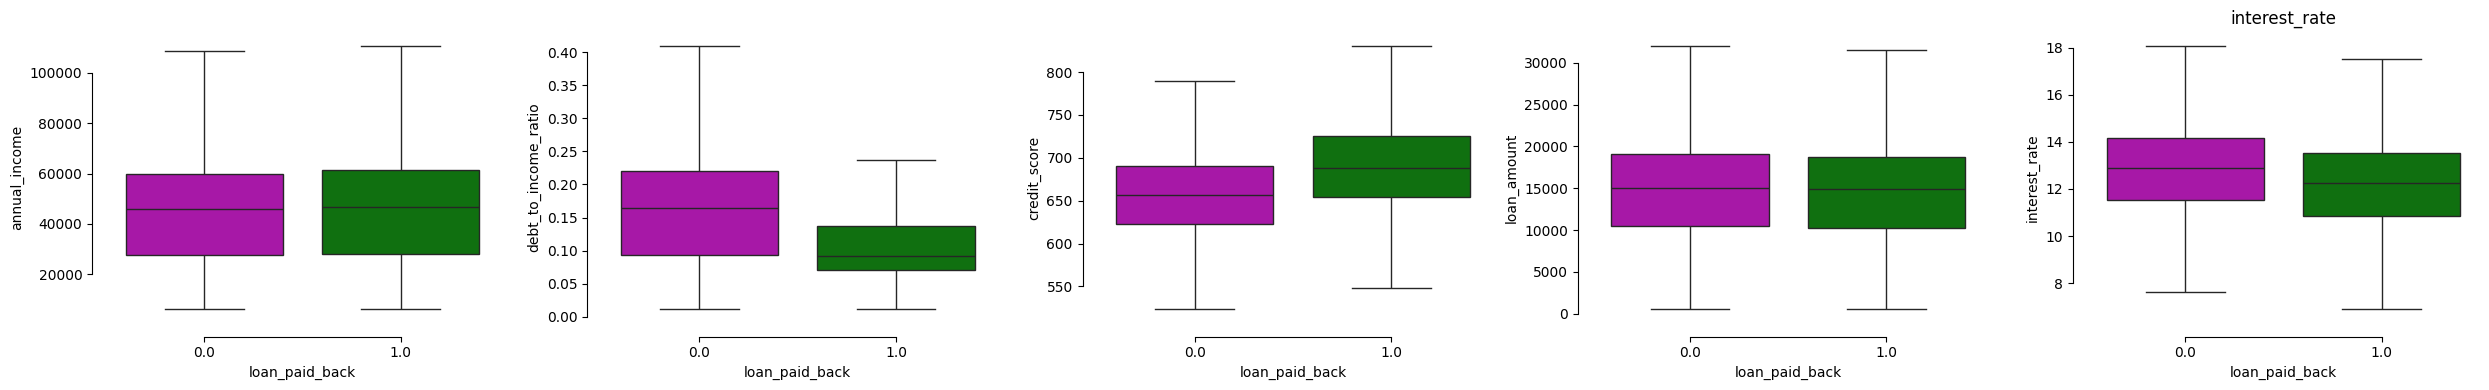

In [25]:
compare_hists(frame, numeric_cols[:-1])

In [26]:
frame.groupby("loan_paid_back")[numeric_cols].describe().T

loan_paid_back                        0.0            1.0
annual_income        count  119500.000000  474494.000000
                     mean    47875.503881   48296.999711
                     std     27199.060946   26587.212646
                     min      6098.800000    6002.430000
                     25%     27479.037500   28101.960000
                     50%     45935.390000   46664.370000
                     75%     59893.150000   61247.170000
                     max    393381.740000  393064.030000
debt_to_income_ratio count  119500.000000  474494.000000
                     mean        0.166564       0.109144
                     std         0.083245       0.058975
                     min         0.011000       0.011000
                     25%         0.093000       0.070000
                     50%         0.165000       0.092000
                     75%         0.220000       0.137000
                     max         0.627000       0.577000
credit_score         count  119500.000000  474494.000000
                     mean      655.010628     687.440208
                     std        51.680938      54.418255
                     min       395.000000     395.000000
                     25%       623.000000     654.000000
                     50%       657.000000     688.000000
                     75%       690.000000     725.000000
                     max       849.000000     849.000000
loan_amount          count  119500.000000  474494.000000
                     mean    15072.223883   15007.220145
                     std      6945.374637    6921.722581
                     min       507.420000     500.090000
                     25%     10446.667500   10235.450000
                     50%     15078.790000   14957.850000
                     75%     19100.740000   18780.365000
                     max     48959.950000   48954.700000
interest_rate        count  119500.000000  474494.000000
                     mean       12.881495      12.224088
                     std         1.981273       1.994191
                     min         3.890000       3.200000
                     25%        11.550000      10.870000
                     50%        12.875000      12.250000
                     75%        14.170000      13.530000
                     max        20.990000      20.840000
loan_paid_back       count  119500.000000  474494.000000
                     mean        0.000000       1.000000
                     std         0.000000       0.000000
                     min         0.000000       1.000000
                     25%         0.000000       1.000000
                     50%         0.000000       1.000000
                     75%         0.000000       1.000000
                     max         0.000000       1.000000

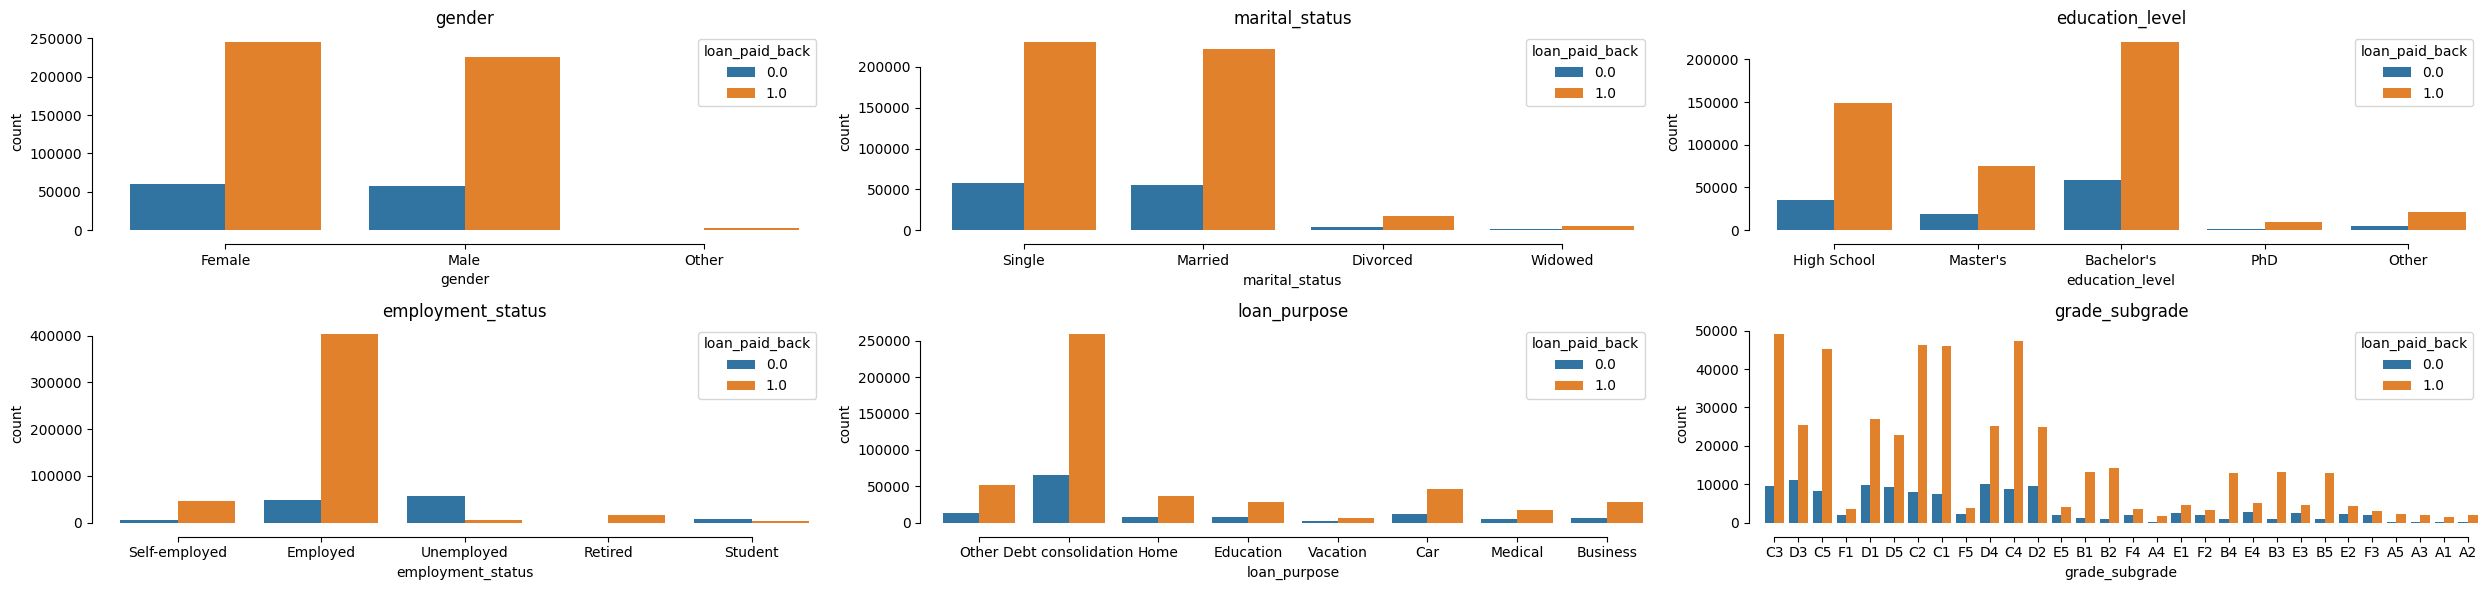

In [27]:
compare_counts(frame, categorical_cols)

In [28]:
results=[]
for col in categorical_cols:
    positive = frame[frame["loan_paid_back"]==1][col].value_counts()
    negative = frame[frame["loan_paid_back"]==0][col].value_counts()
    
    all_index = positive.index.union(negative.index)
    
    for val in all_index:
        results.append({
            "feature": col,
            "value": val,
            "0": negative.get(val, 0),
            "1": positive.get(val, 0),
        })

counts_frame = pd.DataFrame(results)
counts_frame["positive_ratio"] = round(100*counts_frame["1"]/(counts_frame["1"]+counts_frame["0"]), 2)

# Sorting values descending positive_ratio to get better undestanding which feature has biggest impact on positive_ratio
counts_frame = counts_frame.sort_values(["feature", "positive_ratio", "value"],
                                        ascending=[True, False, True]
                                       ).reset_index(drop=True)
counts_frame

,feature,value,0,1,positive_ratio
0,education_level,PhD,1873,9149,83.01
1,education_level,High School,34938,148654,80.97
2,education_level,Other,5261,21416,80.28
3,education_level,Master's,18401,74696,80.23
4,education_level,Bachelor's,59027,220579,78.89
5,employment_status,Retired,46,16407,99.72
6,employment_status,Self-employed,5329,47151,89.85
7,employment_status,Employed,47703,402942,89.41
8,employment_status,Student,8787,3144,26.35
9,employment_status,Unemployed,57635,4850,7.76


The data does not contain missing values.

Target: loan_paid_back – binary: 0 / 1 (Imbalance ~ 1:5)

Numeric variables:
 - annual_income         - distributions for 0 and 1 almost identical,weak information
 - debt_to_income_ratio  - median 0: 0.165 (close to the upper quartile), median 1: 0.092 (close to the lower quartile), clear difference between classes
 - credit_score          - shifted distributions; higher median and quantiles, discriminating potential
 - loan_amount           - distributions for 0 and 1 almost identical, weak information
 - interest_rate         - for class 1 gently shifted towards lower values, the feature has a minor impact

Categorical variables:
 - education_level       - orderly, the higher the level of education, the higher the loan_paid_back
 - employment_status     - strong effect: retired almost always payback, unemployed almost never
 - gender                - no difference between genders, weak information
 - grade_subgrade        - orderly, higher subgrade, higher probability of payback
 - loan_purpose          - small differences (~78–82%, payback), weak information
 - marital_status        - small differences (~79–80%, payback), weak information

 The most valuable numerical features are debt_to_income_ratio and credit_score, which show differences in distribution between classes. Ordinal variables such as education_level and grade_subgrade should be coded ordinally, and nominal variable employment_status, are best coded using one-hot. Variables with little impact (annual_income, loan_amount, gender, marital_status) can be left in the model, but their predictive significance is low.

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Numerical EDA

In [30]:
numeric_cols

Index(['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount',
       'interest_rate', 'loan_paid_back'],
      dtype='object')

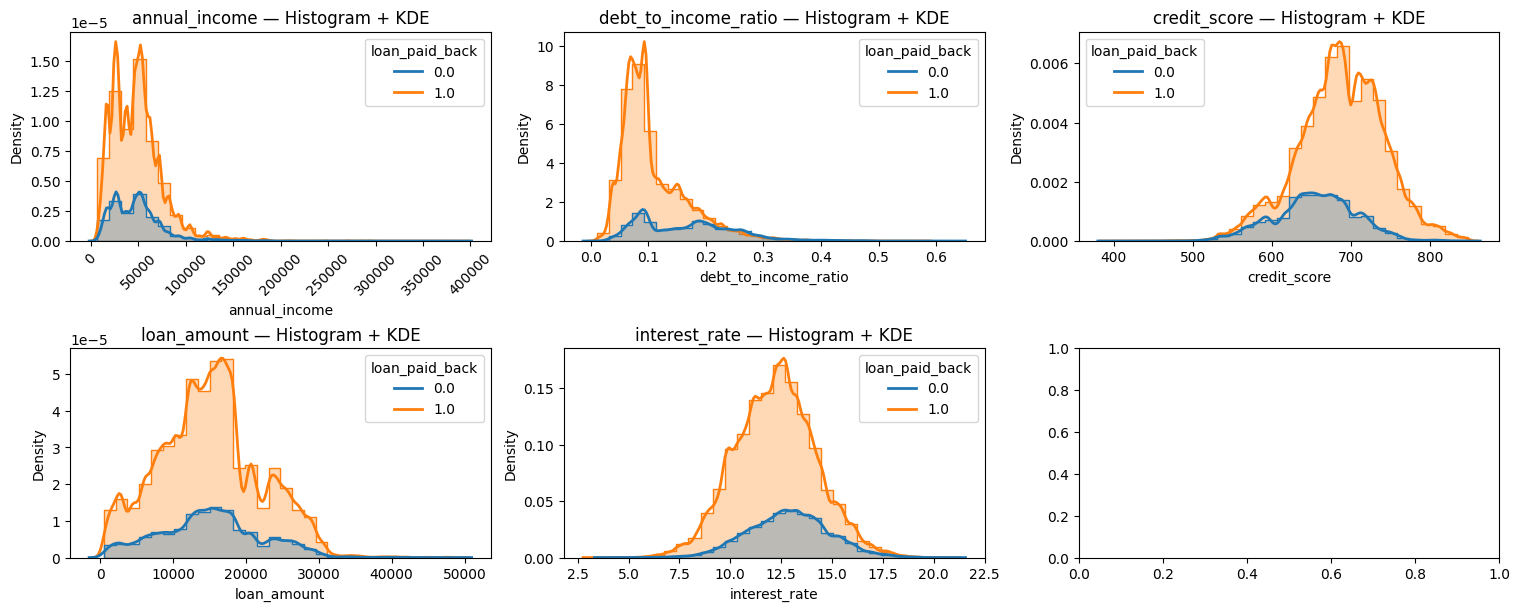

In [31]:
n = len(numeric_cols)
n_cols = 3
n_rows = n // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 3*n_rows), constrained_layout=True)
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
	if col == "loan_paid_back": continue
	sns.histplot(
		data=frame,
		x=col,
		hue='loan_paid_back',
		bins=30,
		stat='density',
		element='step',
		fill=True,
		alpha=0.3,
		ax=axes[i]
	)

	sns.kdeplot(
		data=frame,
		x=col,
		hue='loan_paid_back',
		linewidth=2,
		ax=axes[i]
	)
	axes[i].set_title(f"{col} — Histogram + KDE")
	if col == "annual_income":
		axes[i].tick_params(axis="x", labelrotation=45)
	# plt.tight_layout()

plt.show()

## Notes:

1. Strongly right skewed features:
	- annual_income
	- debt_to_income_ratio
	- loan_amount
2. Possible feature engineering - adding log1p transform?

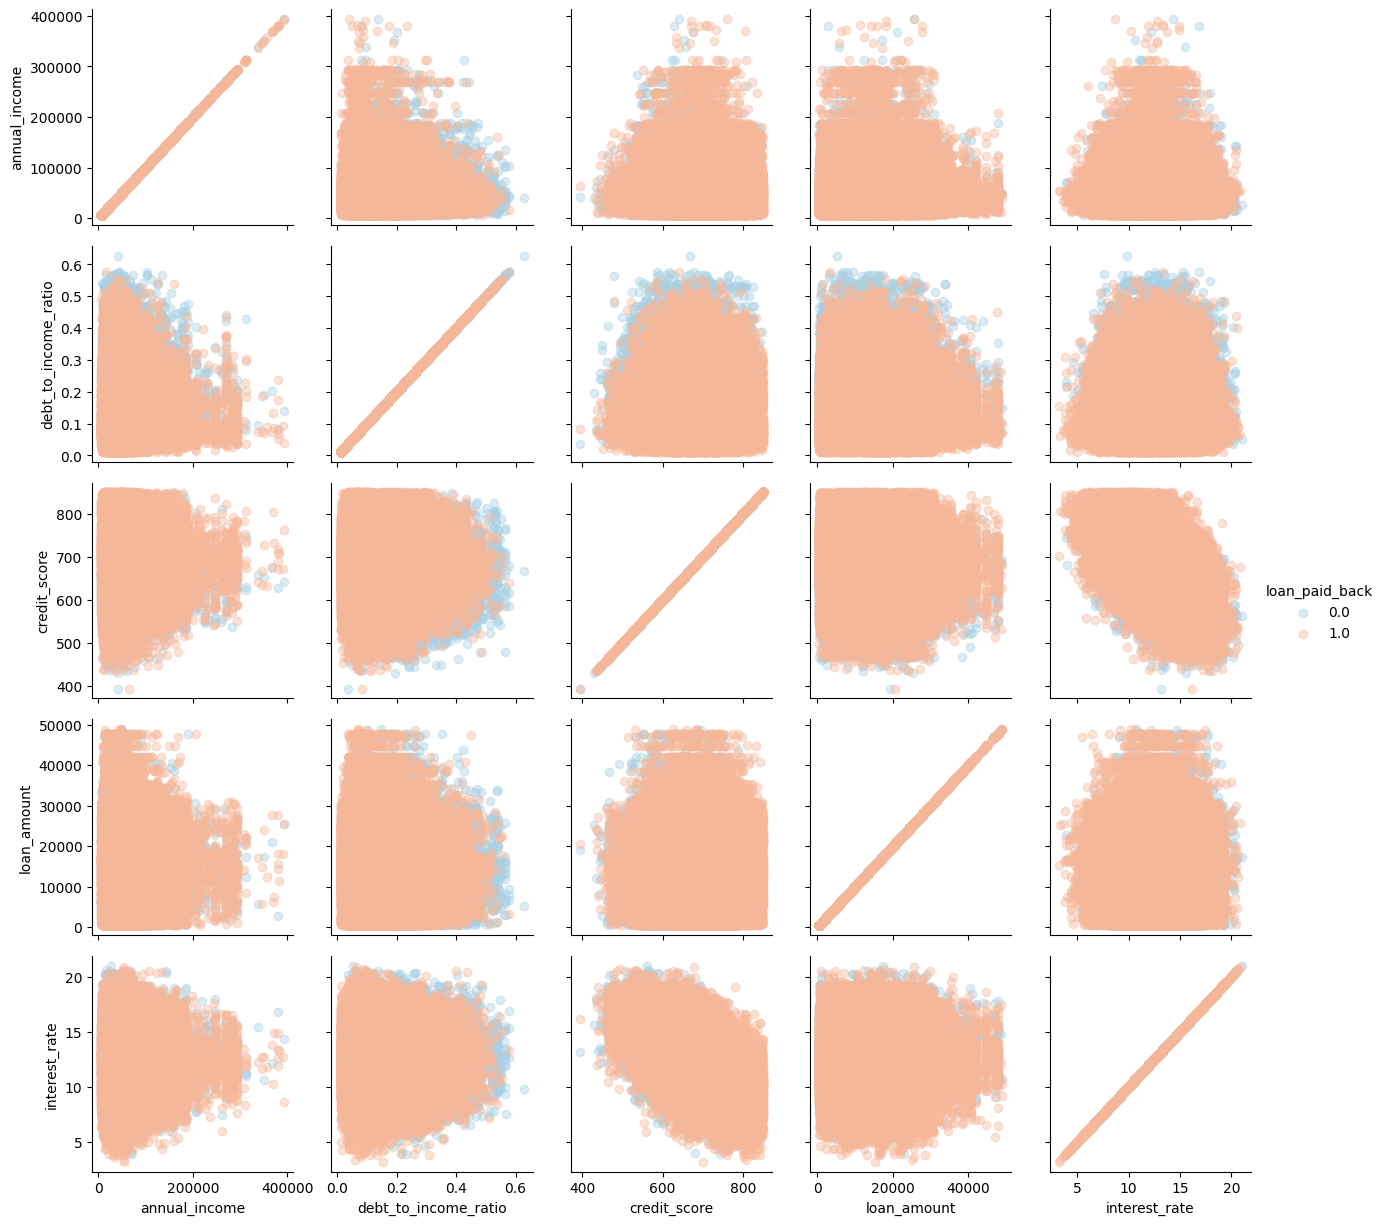

In [32]:
numeric_without_target = [col for col in numeric_cols if col != "loan_paid_back"]
g = sns.PairGrid(
    frame,
    vars=numeric_without_target,
    hue="loan_paid_back",
    palette="RdBu_r"
)
g.map(plt.scatter, alpha=0.4)
g.add_legend()

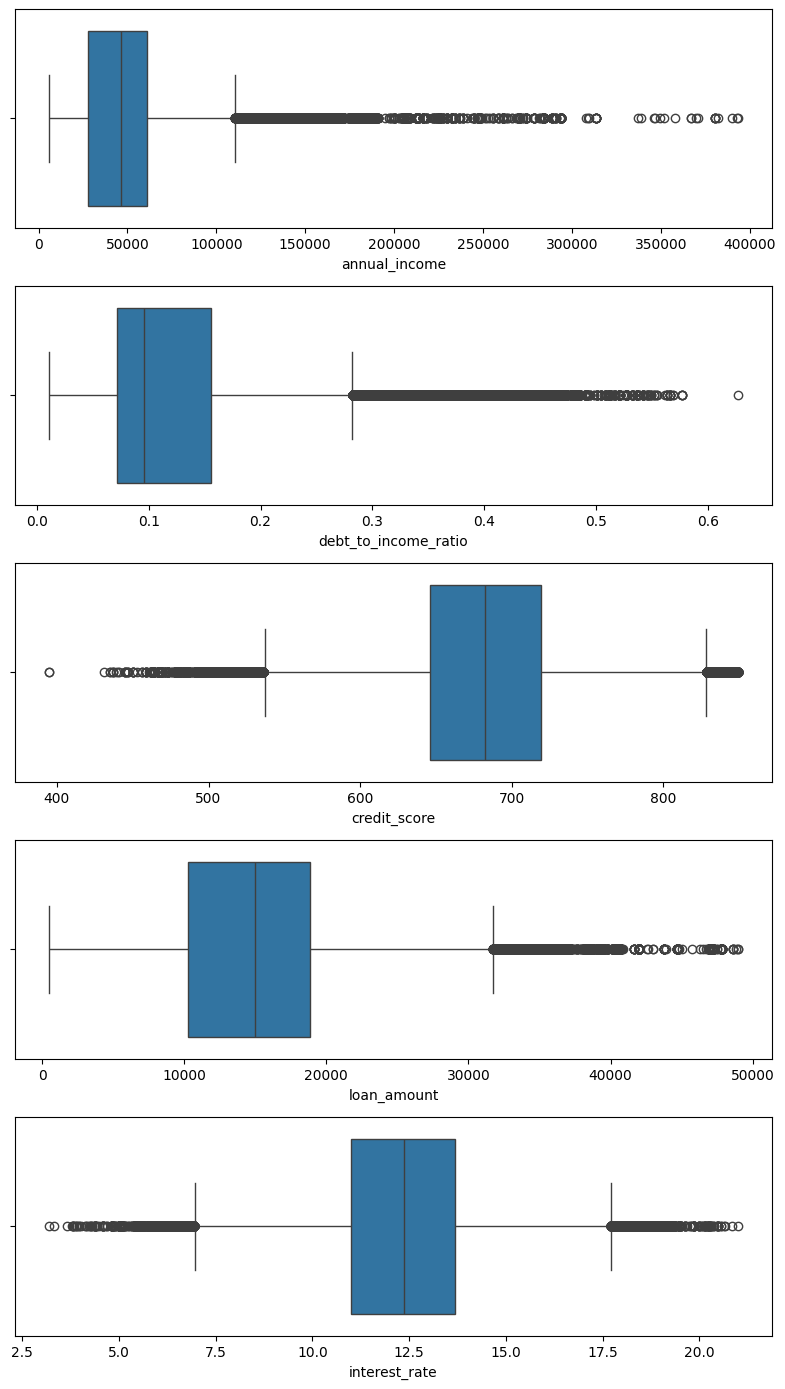

In [33]:
plt.figure(figsize=(8, 14))

for i, col in enumerate(numeric_without_target, start=1):
	plt.subplot(len(numeric_without_target), 1, i)
	sns.boxplot(data=frame, x=col)
plt.tight_layout()
plt.show()

# Notes:
- there are some outliers that potentially could help with creation of model that better generalizes dataset

In [34]:
# DataFrame with outliers removed
df = frame.copy()

In [35]:
for col in numeric_without_target:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df = df[(df[col] > lower) & (df[col] < upper)]


In [36]:
(frame.shape[0] - df.shape[0])/frame.shape[0] * 100 # % of data removed

9.807843176867106

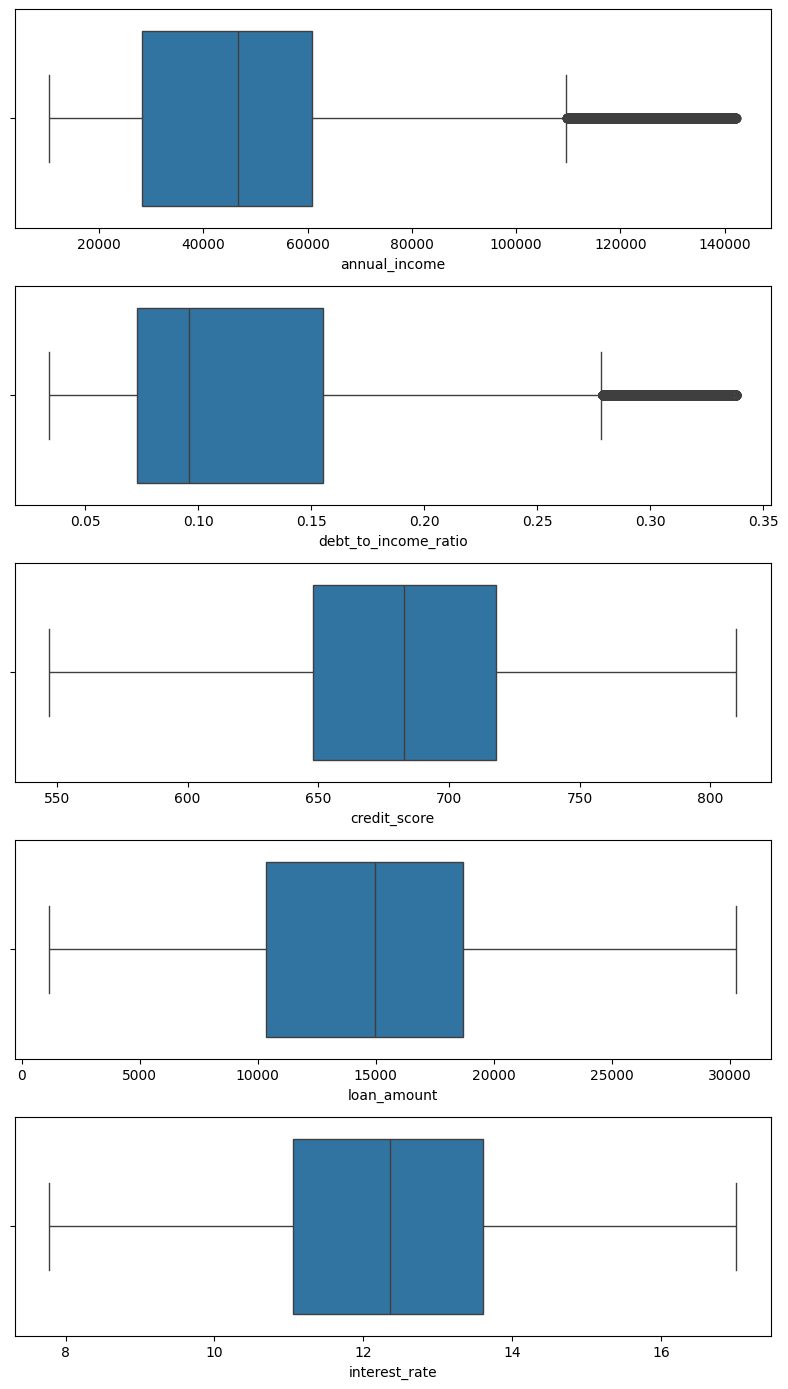

In [37]:
plt.figure(figsize=(8, 14))

for i, col in enumerate(numeric_without_target, start=1):
	plt.subplot(len(numeric_without_target), 1, i)
	sns.boxplot(data=df, x=col)
plt.tight_layout()
plt.show()

### TODO: Check if model performs better on dataset without outliers

In [38]:
df.to_csv('data/processed/df_outliers_removed.csv', index=False)

Text(0.5, 1.0, 'Correlation matrix')

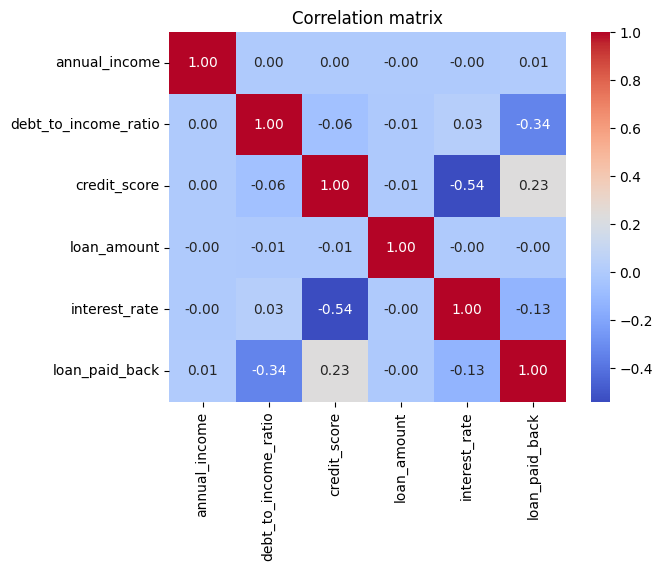

In [39]:
sns.heatmap(
    data=frame.corr(numeric_only=True),
    annot=True,
    cmap='coolwarm',
    fmt="0.2f"
)
plt.title("Correlation matrix")

## NOTES:
- Possible feature engineering:
	1. Ratio/spread:
		- rate_per_score = intrest_rate / credit_score
		- score_per_rate = credit_score / intrest_rate
	2. Interaction:
		- credit_score * intrest_rate	